- https://www.datamanim.com/dataset/03_dataq/typetwo.html#id3

# 5. 중고차 가격 예측 데이터(Regression)

> Attention
- 데이터 설명 : 중고차 가격 예측 데이터 (종속변수 :G3)
- 데이터 출처 : https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=vw.csv (참고, 데이터 수정)    
- x_train : https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_train.csv
- y_train : https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_train.csv
- x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_test.csv
- y_test(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_test.csv

#### 0. 시험 환경 세팅

In [28]:
import pandas as pd

X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_test.csv")

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4960, 10), (4960, 2), (2672, 10), (2672, 2))

#### 1. 라이브러리 및 데이터 호출

In [27]:
import numpy as np
import pandas as pd

In [29]:
X_train.drop('carID', axis=1, inplace=True)
carID = X_test.pop('carID')

y = y_train['price']

X_train.shape, X_test.shape, y.shape

((4960, 9), (2672, 9), (4960,))

#### 2. EDA
- X_train dataset 확인
- null 값 확인
- object column, non-object column 분리

In [8]:
print(X_train.head())
print("="*10)
print(X_train.isnull().sum())

      brand      model  year transmission  mileage fuelType    tax   mpg  \
0    hyundi   Santa Fe  2019    Semi-Auto     4223   Diesel  145.0  39.8   
1  vauxhall        GTC  2015       Manual    47870   Diesel  125.0  60.1   
2      audi        RS4  2019    Automatic     5151   Petrol  145.0  29.1   
3        vw   Scirocco  2016    Automatic    20423   Diesel   30.0  57.6   
4     skoda      Scala  2020    Semi-Auto     3569   Petrol  145.0  47.1   

   engineSize  
0         2.2  
1         2.0  
2         2.9  
3         2.0  
4         1.0  
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [9]:
print("="*10)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4960 non-null   object 
 1   model         4960 non-null   object 
 2   year          4960 non-null   int64  
 3   transmission  4960 non-null   object 
 4   mileage       4960 non-null   int64  
 5   fuelType      4960 non-null   object 
 6   tax           4960 non-null   float64
 7   mpg           4960 non-null   float64
 8   engineSize    4960 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 348.9+ KB
None


In [30]:
categorical = X_train.select_dtypes(include='object').columns
integer= X_train.select_dtypes(include=['int','float']).columns

In [42]:
X_train[integer]

,year,mileage,tax,mpg,engineSize
0,2019,4223,145.0,39.8,2.2
1,2015,47870,125.0,60.1,2.0
2,2019,5151,145.0,29.1,2.9
3,2016,20423,30.0,57.6,2.0
4,2020,3569,145.0,47.1,1.0
...,...,...,...,...,...
4955,2015,24314,125.0,56.6,2.1
4956,2017,18000,145.0,51.4,3.0
4957,2015,84932,30.0,60.1,2.0
4958,2017,30150,145.0,62.8,3.0


In [33]:
for c in integer:
    print(c, X_train[c].max())
    print(X_train[c].max())
    print('='*100)

year 2020
2020
mileage 259000
259000
tax 580.0
580.0
mpg 470.8
470.8
engineSize 6.6
6.6


In [34]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe11439d130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe11439d670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe11438ae50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe11439dbb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe11439de50>,
 'means': []}

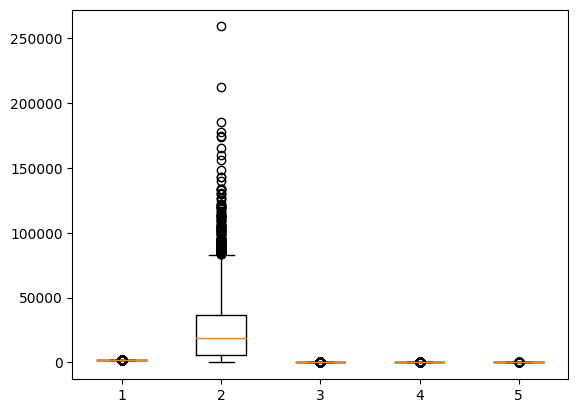

In [43]:
fig, ax = plt.subplots()

ax.boxplot(X_train[integer])

#### 3. Preprocessing

> tax 컬럼 제거

> outlier 제거

In [44]:
del X_train["tax"]
del X_test["tax"]

In [52]:
integer=X_train.select_dtypes(include=['int','float']).columns
print(integer)

Index(['year', 'mileage', 'mpg', 'engineSize'], dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe09809fe80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0980b03d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe2486f4a60>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe0980b07f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0980b0a90>,
 'means': []}

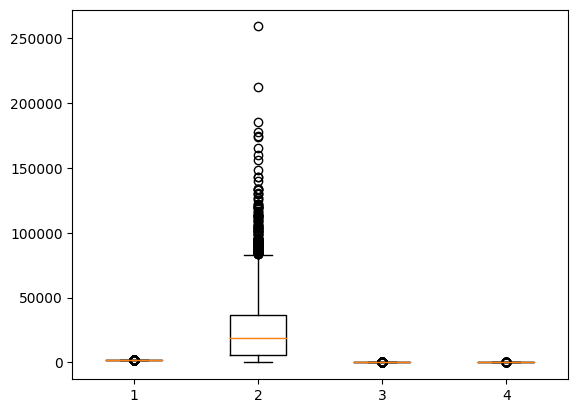

In [51]:
fig, ax = plt.subplots()
ax.boxplot(X_train[integer])

In [ ]:
# 결과값

> 인코딩 및 표준화
- 범주형 컬럼 : LabelEncoder
- 전체 컬럼 : 표준화

In [53]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [54]:
scaler = StandardScaler()
X_train[integer] = scaler.fit_transform(X_train[integer])
X_test[integer] = scaler.transform(X_test[integer])

le = LabelEncoder()
X_train[categorical] = X_train[categorical].apply(le.fit_transform)
X_test[categorical] = X_test[categorical].apply(le.fit_transform)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe098015340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe098015880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0980150a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe098015ca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe098015f40>,
 'means': []}

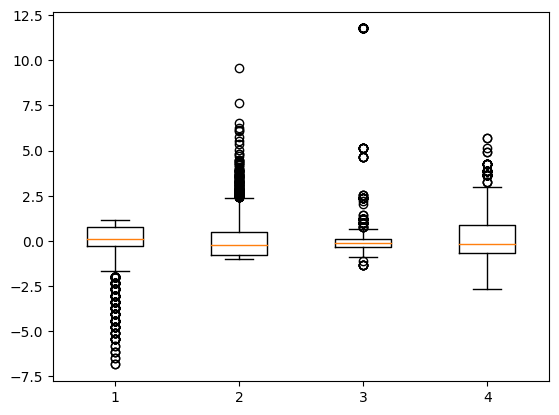

In [55]:
fig, ax = plt.subplots()
ax.boxplot(X_train[integer])

#### 4. Modeling
- RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, XGBRFRegressor,DNN
- r2_score를 이용해 측정

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
import tensorflow as tf

In [17]:
X_train.head()

,brand,model,year,transmission,mileage,fuelType,mpg,engineSize
0,3,69,0.784430,3,-0.848304,0,-0.295744,0.095814
1,7,30,-0.602655,1,0.937516,0,0.272200,-0.157579
2,0,58,0.784430,0,-0.810335,4,-0.595105,0.982689
3,8,71,-0.255884,0,-0.185480,0,0.202256,-0.157579
4,5,70,1.131202,3,-0.875062,4,-0.091508,-1.424542


In [58]:
RFR=RandomForestRegressor(random_state=1)
GBR=GradientBoostingRegressor(random_state=1)
XGBR=XGBRegressor(random_state=1)
XGBRF=XGBRFRegressor(random_state=1)
models = [RFR, GBR, XGBR, XGBRF]

In [20]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

### GridSearchCV parameter
- verbose: 상세출력(활동 로그 제시 0= X 1= O)
- n_jobs: 사용하는 cpu 코어 수 
- scoring: 평가지표. r2, accuracy, roc_auc 등이 있음.

In [23]:
print(str(models[0]).split('('))

['RandomForestRegressor', 'random_state=1)']


In [12]:
best_estimator_models = []
params = {'n_estimators':[100, 500], 'max_depth':[1,2,3,4,5]}
for model in models:
    gs=GridSearchCV(estimator=model,param_grid=params,cv=3,scoring='r2',n_jobs=5) #cv=crossvalidation
    gs.fit(X_train,y_train['price'])
    
    print(str(model).split('(')[0]) 
    print('params : ',gs.best_params_)
    print('score : ',gs.best_score_)
    best_estimator_models.append(gs.best_estimator_) #각 모델의 best estimator을 목록에 추가
    print('='*10)

RandomForestRegressor
params :  {'max_depth': 5, 'n_estimators': 100}
score :  0.8572915454614414
GradientBoostingRegressor
params :  {'max_depth': 4, 'n_estimators': 500}
score :  0.962162941530108
XGBRegressor
params :  {'max_depth': 4, 'n_estimators': 500}
score :  0.9625106201746224
XGBRFRegressor
params :  {'max_depth': 5, 'n_estimators': 100}
score :  0.8635064729223298


XGBRegressor 가 제일 좋은 모델로 뽑혔다.

In [26]:
best_estimator_models[2]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [61]:
xgbr=best_estimator_models[2]
xgbr.fit(X_train,y)
pred=np.round(xgbr.predict(X_test))

In [29]:
y_train['price']

0       31995
1        7700
2       58990
3       12999
4       16990
        ...  
4955    17999
4956    28900
4957     8998
4958    23198
4959    14900
Name: price, Length: 4960, dtype: int64

In [99]:
y.mean()

23469.94375

In [62]:
output=pd.DataFrame({'CarID': carID, 'price':pred}) # carID = X_test.pop('carID') pred=xgbr.predict(X_test)
output

,CarID,price
0,12000,41943.0
1,12001,23389.0
2,12004,56858.0
3,12013,13780.0
4,12017,46081.0
...,...,...
2667,19618,40661.0
2668,19620,18084.0
2669,19626,22126.0
2670,19630,24224.0


In [63]:
print('rmse :', np.sqrt(mean_squared_error(y_test['price'], pred))) #rmse는 데이터 scale에 따라 그 크기가 천차만별이다.
print('r2 :', r2_score(y_test['price'], pred))

rmse : 4145.901513005214
r2 : 0.9376055714251944


In [64]:
# DNN
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [81]:
X_train_arr.shape

(4960, 8)

In [57]:
X_train.isna().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

In [65]:
y.min()

450

   tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,))
 
    - units: 해당 은닉층에서 활동하는 뉴런의 수

    - activation: 활성화함수, 해당 은닉층의 가중치와 편향의 연산 결과를 어느 함수에 적합하여 출력할 것인가?

    - input_shape: 입력 벡터의 크기, 여기서 13은 해당 데이터 프레임의 열의 수를 나타낸다. 데이터의 구조(이미지, 영상)에 따라 달라질 수 있다. 첫 번째 은닉층에서만 정의해준다.  
    - input_dim=13 으로도 가능


In [76]:
epoch = 1000
batch_size = 4

filepath = f"model_check_point_epoch_{epoch}_batch_{batch_size}.h5"

reduceLR = ReduceLROnPlateau(monitor="loss",
                             factor = 0.5, # loss 값을 개선하기 위한 학습률 변경 시작 0.1 -> 0.2 0> 0.4 
                             patience = 10) # epoch 10 동안 loss 값이 개선되지 않으면 callback 호출

checkpoint = ModelCheckpoint(filepath = filepath,
                             monitor = "loss",
                             save_best_only = True) #가장 Best 한 값만 저장한다. 

earlystopping = EarlyStopping(monitor = "loss",
                              patience=10)

optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.1)

In [117]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, activation="relu", input_shape=(8,)))
model.add(tf.keras.layers.Dense(units=4, activation="relu"))
model.add(tf.keras.layers.Dense(units=1))      

In [119]:
model.compile(loss='mse', optimizer= "rmsprop", metrics = ["mae"])

In [109]:
X_train_arr=np.array(X_train)
y_arr=np.array(y)

In [72]:
X_train_arr

array([[ 3.        , 69.        ,  0.78443036, ...,  0.        ,
        -0.29574449,  0.09581413],
       [ 7.        , 30.        , -0.60265505, ...,  0.        ,
         0.27220045, -0.15757862],
       [ 0.        , 58.        ,  0.78443036, ...,  4.        ,
        -0.59510464,  0.98268877],
       ...,
       [ 8.        , 11.        , -0.60265505, ...,  0.        ,
         0.27220045, -0.15757862],
       [ 0.        ,  3.        ,  0.09088765, ...,  0.        ,
         0.34773993,  1.10938515],
       [ 4.        , 66.        , -0.9494264 , ...,  0.        ,
         0.17148115,  1.10938515]])

In [74]:
y_arr

array([31995,  7700, 58990, ...,  8998, 23198, 14900])

In [120]:
model.fit(X_train_arr, y_arr, epochs= 1000,callbacks=[reduceLR, checkpoint, earlystopping])

Epoch 1/1000
155/155 [==============================] - 1s 6ms/step - loss: 819528064.0000 - mae: 23460.9668 - lr: 0.0010
Epoch 2/1000
155/155 [==============================] - 1s 4ms/step - loss: 818836800.0000 - mae: 23446.6250 - lr: 0.0010
Epoch 3/1000
155/155 [==============================] - 1s 4ms/step - loss: 817681280.0000 - mae: 23422.8027 - lr: 0.0010
Epoch 4/1000
155/155 [==============================] - 1s 4ms/step - loss: 815952448.0000 - mae: 23387.3340 - lr: 0.0010
Epoch 5/1000
155/155 [==============================] - 1s 4ms/step - loss: 813575808.0000 - mae: 23337.6562 - lr: 0.0010
Epoch 6/1000
128/155 [=======================>......] - ETA: 0s - loss: 804263104.0000 - mae: 23177.1777

KeyboardInterrupt: 

In [51]:
tf.config.list_physical_devices('GPU')  #/GPU:0 : Tensorflow가 인식한 GPU들 중에서 첫 번째 GPU를 사용하겠다는 뜻입니다.

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]